# This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Path

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet_mod1'
data_path2 = parent_path / 'Data/googlenet_mod2'
data_path3 = parent_path / 'Data/googlenet_mod3'
data_path4 = parent_path / 'Data/googlenet_mod4'
print('The data path is:', data_path1, data_path2, data_path3)

The current path is: /root/GreenAI/Cloud/4090/code
The parent path is: /root/GreenAI/Cloud/4090
The data path is: /root/GreenAI/Cloud/4090/Data/googlenet_mod1 /root/GreenAI/Cloud/4090/Data/googlenet_mod2 /root/GreenAI/Cloud/4090/Data/googlenet_mod3


### extract data

In [3]:
fashion_path = 'fashion_mnist'
cifar_path = 'cifar100'

In [4]:
batch_sizes = [256]
epochs = [20]
rounds = 1
folder_name = f"E{epochs[0]}_B{batch_sizes[0]}_R{rounds-1}"
print(folder_name)

E20_B256_R0


In [5]:
f_path = fashion_path + '/' + folder_name
c_path = cifar_path + '/' + folder_name
print(f_path, c_path)

fashion_mnist/E20_B256_R0 cifar100/E20_B256_R0


#### read all the data from all the folders

In [6]:
# find the files path
mod1_path_f = data_path1 / f_path
mod2_path_f = data_path2 / f_path    
mod3_path_f = data_path3 / f_path
mod4_path_f = data_path4 / f_path
print('The model path is:', mod1_path_f,'\n',
                            mod2_path_f,'\n',
                            mod3_path_f,'\n',
                            mod4_path_f)
print('*'*50)
mod1_path_c = data_path1 / c_path
mod2_path_c = data_path2 / c_path
mod3_path_c = data_path3 / c_path
mod4_path_c = data_path4 / c_path
print('The model path is:', mod1_path_c,'\n',
                            mod2_path_c,'\n',
                            mod3_path_c,'\n',
                            mod4_path_c)

The model path is: /root/GreenAI/Cloud/4090/Data/googlenet_mod1/fashion_mnist/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod2/fashion_mnist/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod3/fashion_mnist/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod4/fashion_mnist/E20_B256_R0
**************************************************
The model path is: /root/GreenAI/Cloud/4090/Data/googlenet_mod1/cifar100/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod2/cifar100/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod3/cifar100/E20_B256_R0 
 /root/GreenAI/Cloud/4090/Data/googlenet_mod4/cifar100/E20_B256_R0


In [7]:
# for each path, there is fashionMNIST dataset and CIFAR100 dataset, stored in different folders
# find the files in the folder
mod_path_f = [mod1_path_f, mod2_path_f, mod3_path_f, mod4_path_f]
mod_path_c = [mod1_path_c, mod2_path_c, mod3_path_c, mod4_path_c]
for i in range(4):
    # find the files in the folder
    files_f = os.listdir(mod_path_f[i])
    files_c = os.listdir(mod_path_c[i])
    print(f'The files in the folder {mod_path_f[i]} and folder {mod_path_c[i]} are: {files_f}, {files_c}')

The files in the folder /root/GreenAI/Cloud/4090/Data/googlenet_mod1/fashion_mnist/E20_B256_R0 and folder /root/GreenAI/Cloud/4090/Data/googlenet_mod1/cifar100/E20_B256_R0 are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy'], ['Layers_time.npy', 'Train_part_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy']
The files in the folder /root/GreenAI/Cloud/4090/Data/googlenet_mod2/fashion_mnist/E20_B256_R0 and folder /root/GreenAI/Cloud/4090/Data/googlenet_mod2/cifar100/E20_B256_R0 are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy'], ['Layers_time.npy', 'Train_part_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy']
The files in the folder /root/GreenAI/Cloud/4090/Data/googlenet_mod3/fashion_mnist/E20_B256_R0 and folder /root/GreenAI/Cloud/4090/Data/googlenet_mod3/cifar100/E20_B256_R0 are: ['Layers_ti

## Load files

### fashionmnist

In [8]:
# read all the files in all the folders
# LayersTime
LayersTime_mod1f = np.load(mod_path_f[0] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod2f = np.load(mod_path_f[1] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod3f = np.load(mod_path_f[2] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod4f = np.load(mod_path_f[3] / 'Layers_time.npy', allow_pickle=True)
# TrainPartTime
TrainPartTime_mod1f = np.load(mod_path_f[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2f = np.load(mod_path_f[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3f = np.load(mod_path_f[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4f = np.load(mod_path_f[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1f = np.load(mod_path_f[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2f = np.load(mod_path_f[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3f = np.load(mod_path_f[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4f = np.load(mod_path_f[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1f = np.load(mod_path_f[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2f = np.load(mod_path_f[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3f = np.load(mod_path_f[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4f = np.load(mod_path_f[3] / 'Epoch_energy.npy', allow_pickle=True)

# print(f'LayersTime_mod1f: {LayersTime_mod1f}','\n',
#       f'LayersTime_mod2f: {LayersTime_mod2f}','\n',
#       f'LayersTime_mod3f: {LayersTime_mod3f}','\n',
#       f'LayersTime_mod4f: {LayersTime_mod4f}')

#### LayersTime

In [9]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


In [10]:
LayersTime_flist = [LayersTime_mod1f, LayersTime_mod2f, LayersTime_mod3f, LayersTime_mod4f]

/tmp/ipykernel_178857/886318222.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(LayersName, rotation=45)


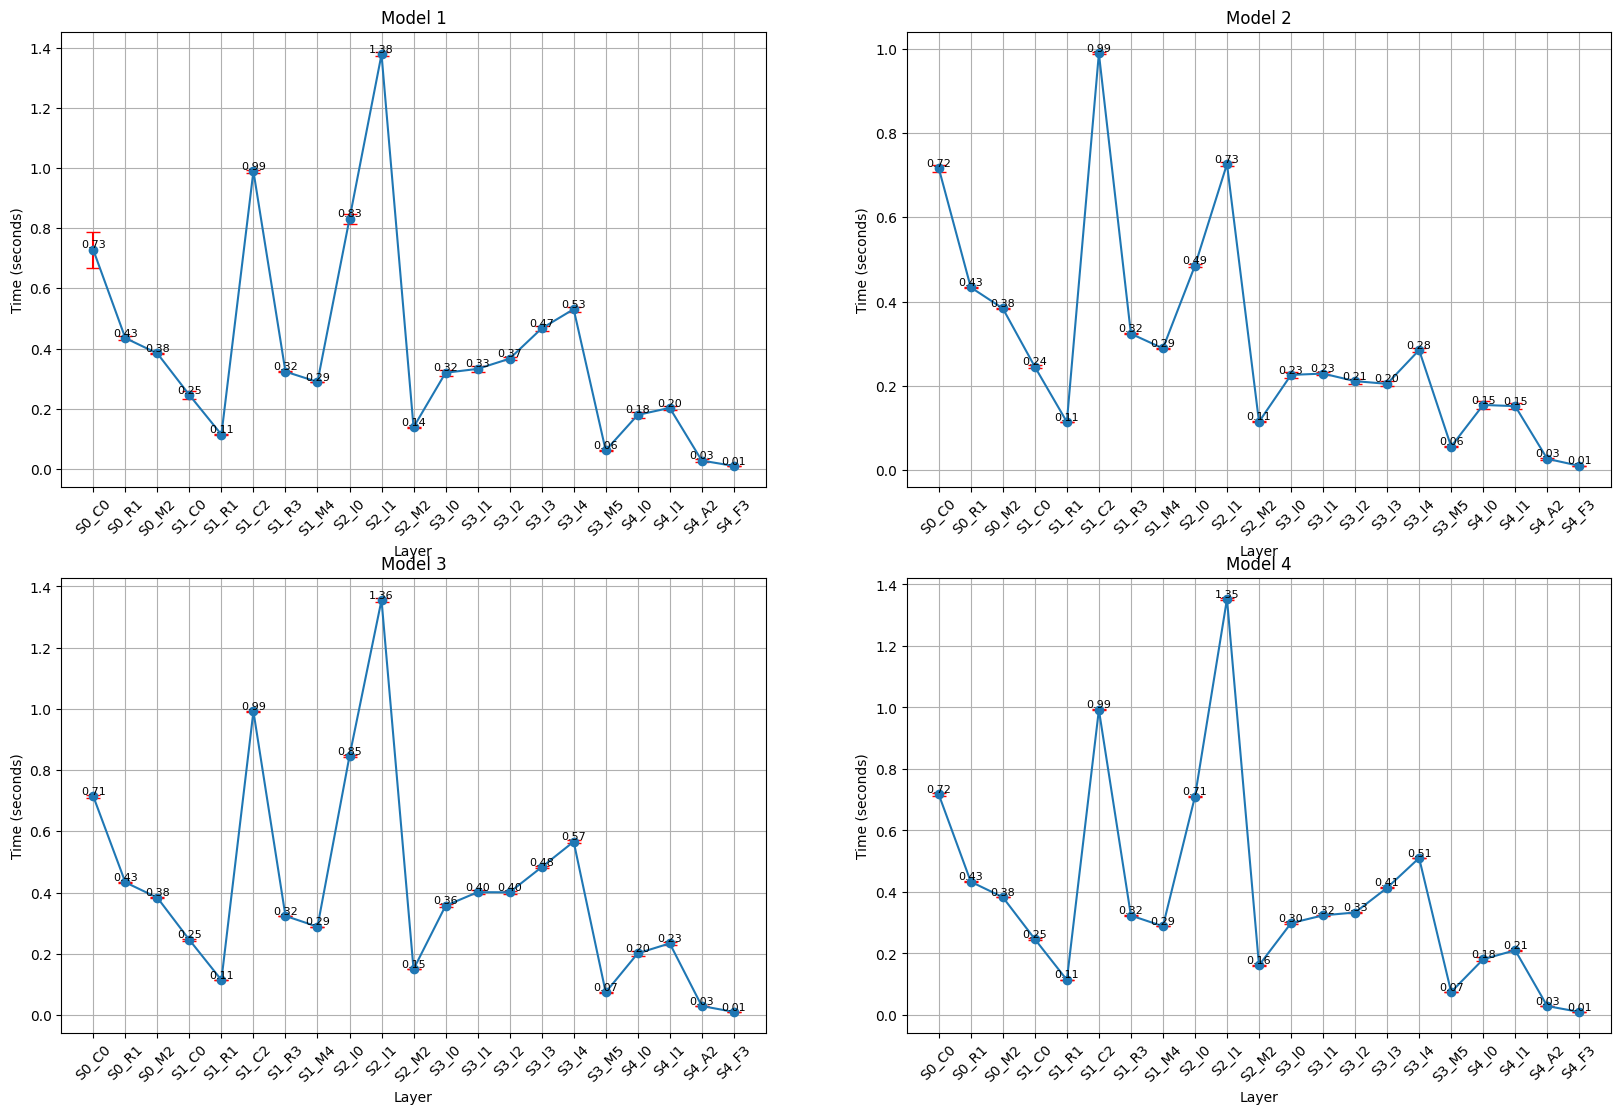

In [11]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 13))
for i, ax in enumerate(axs.flat):
    LayersTimei = LayersTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    layer_means = np.mean(LayersTimei, axis=1)
    layer_stds = np.std(LayersTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(LayersName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(layer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)


In [12]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [13]:
IncepNum = len(IncepBlock)
IncepTime_mod1f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod2f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod3f = np.zeros((IncepNum, epochs[0]))
IncepTime_mod4f = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime_mod1f[i,:] = LayersTime_mod1f[IncepBlockIndex[i], :]
    IncepTime_mod2f[i,:] = LayersTime_mod2f[IncepBlockIndex[i], :]
    IncepTime_mod3f[i,:] = LayersTime_mod3f[IncepBlockIndex[i], :]
    IncepTime_mod4f[i,:] = LayersTime_mod4f[IncepBlockIndex[i], :]
# print(f'The inception time of model 1 is {IncepTime_mod1f}','\n',
#       f'The inception time of model 2 is {IncepTime_mod2f}','\n',
#       f'The inception time of model 3 is {IncepTime_mod3f}','\n',
#       f'The inception time of model 4 is {IncepTime_mod4f}')

In [14]:
IncepTime_flist = [IncepTime_mod1f, IncepTime_mod2f, IncepTime_mod3f, IncepTime_mod4f]

/tmp/ipykernel_178857/1132251443.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(IncepBlock, rotation=45)


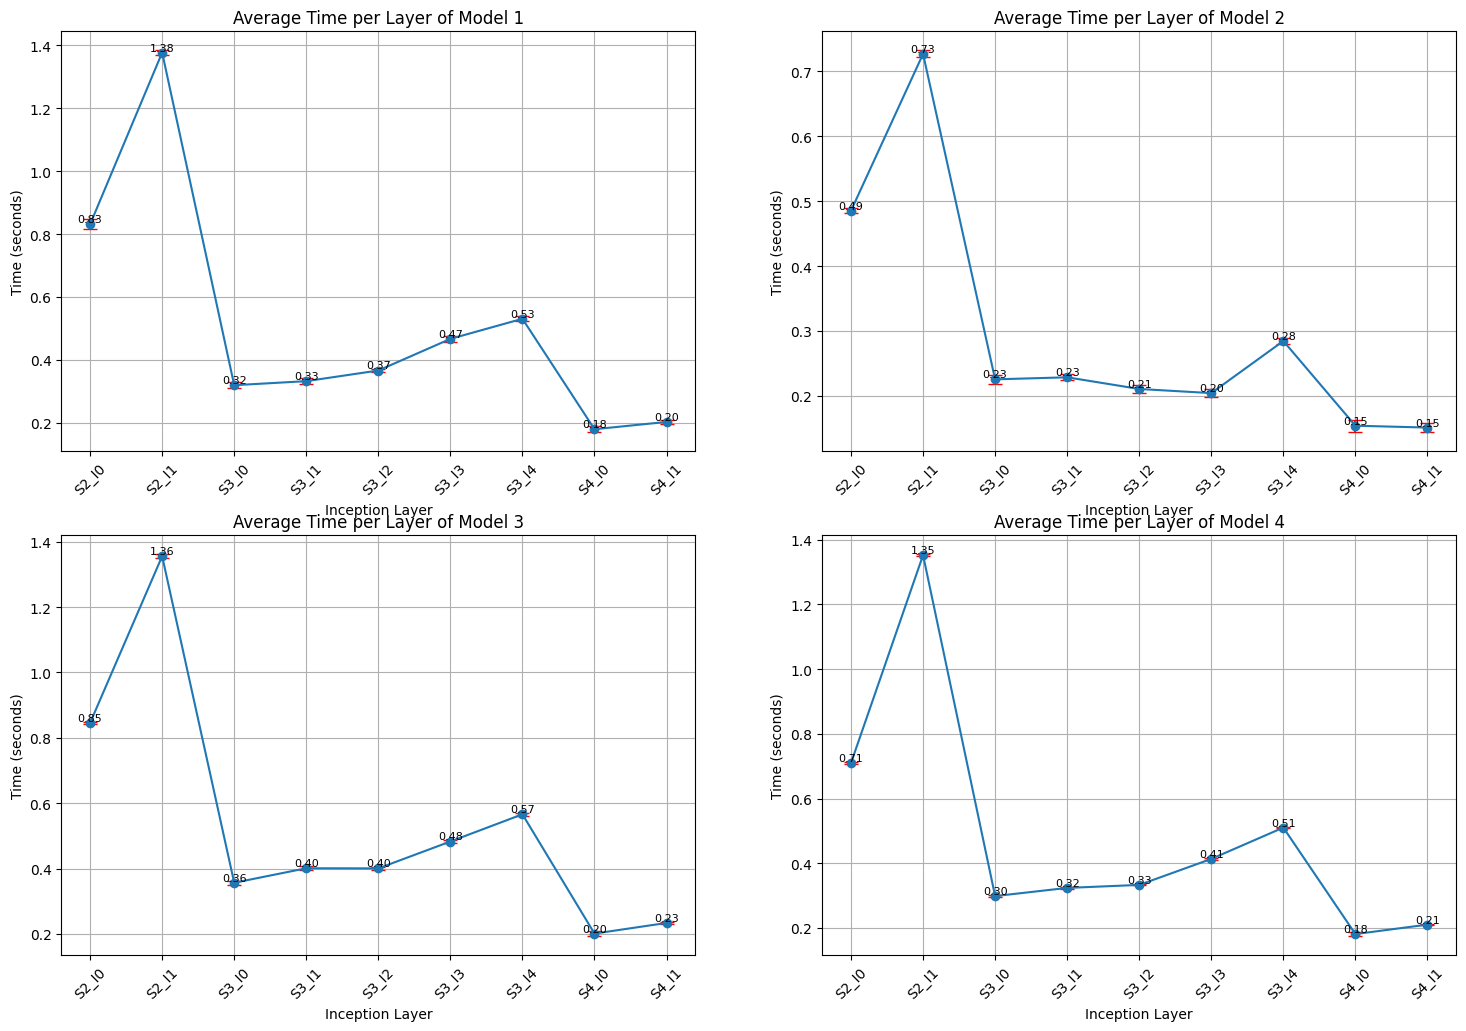

In [15]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
for i, ax in enumerate(axs.flat):
    IncepTimei = IncepTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    inceplayer_means = np.mean(IncepTimei, axis=1)
    inceplayer_stds = np.std(IncepTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time per Layer of Model {i+1}')
    ax.set_xlabel('Inception Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(IncepBlock, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(inceplayer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

#### TrainPartTime

In [16]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

In [17]:
TrainPartTime_flist = [TrainPartTime_mod1f, TrainPartTime_mod2f, TrainPartTime_mod3f, TrainPartTime_mod4f]

/tmp/ipykernel_178857/2325149302.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


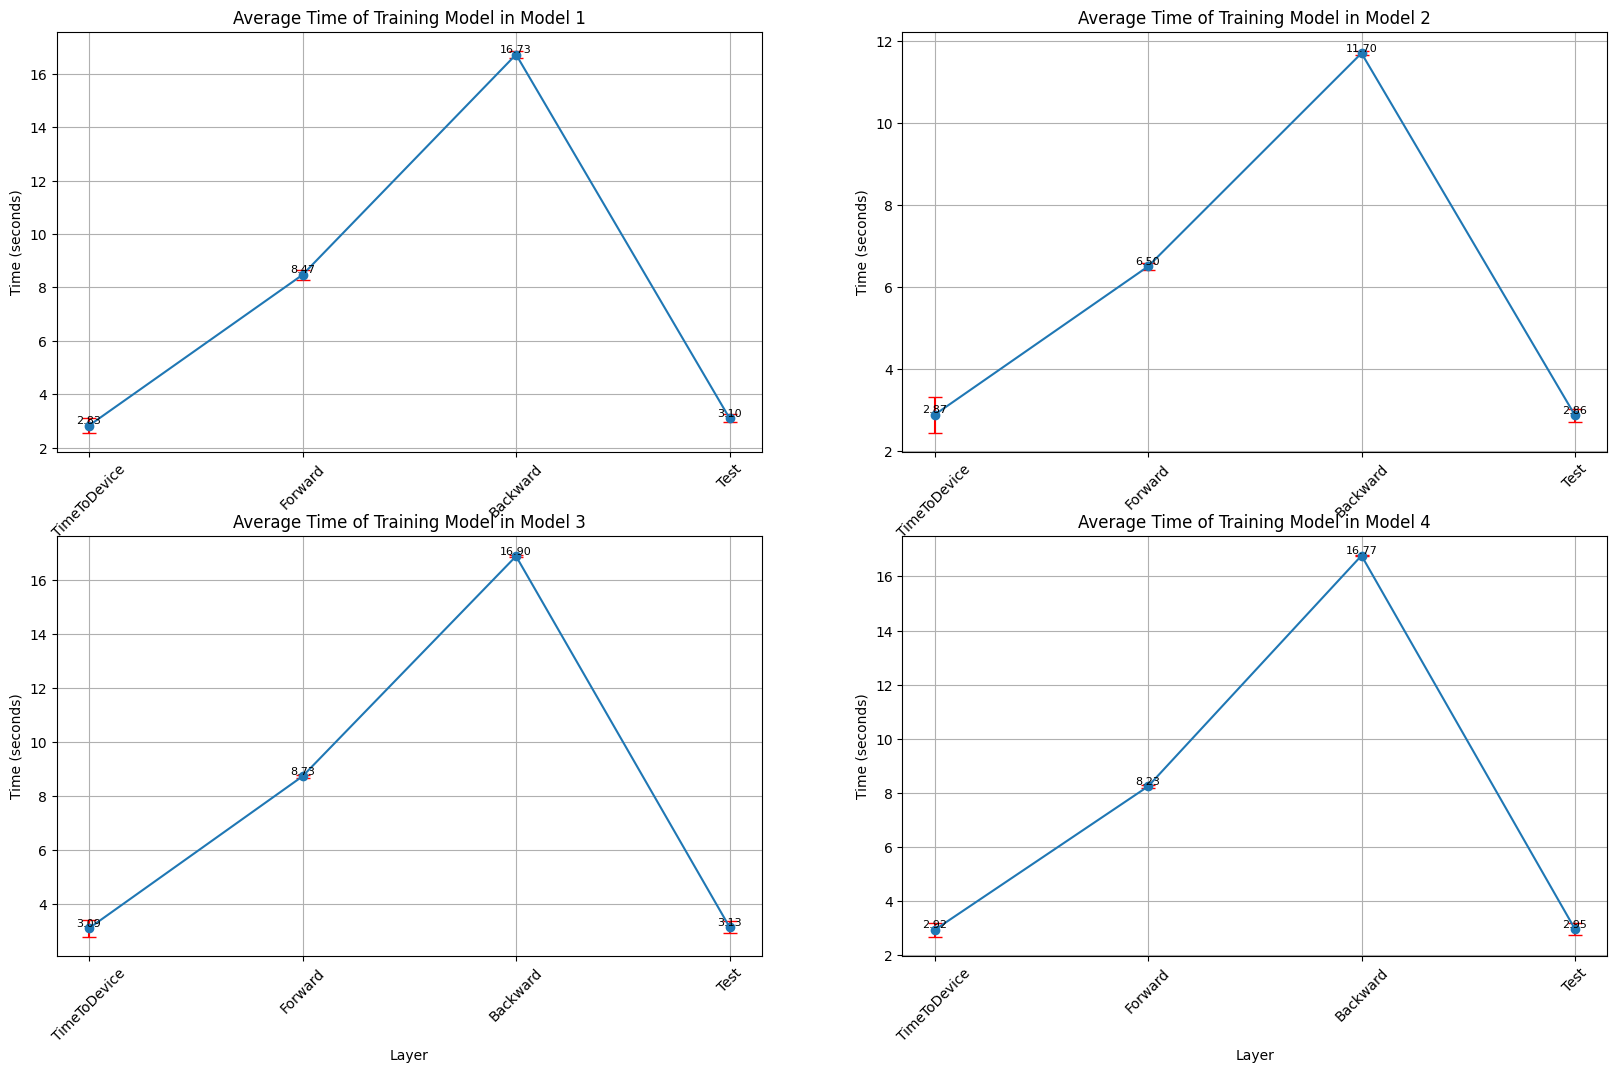

In [18]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

#### EnergyEpoch

In [19]:
EpochEnergy_flist = [EpochEnergy_mod1f, EpochEnergy_mod2f, EpochEnergy_mod3f, EpochEnergy_mod4f]
# print(EpochEnergy_flist)
EpochEnergy_f = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [20]:
for i in range(len(EpochEnergy_flist)):
    for epoch in range(len(EpochEnergy_flist[i])):
        EpochEnergy_fi = EpochEnergy_flist[i]
        epoch_energy = EpochEnergy_fi[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_f[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_f}')

The total energy of each epoch in the model is [[ 9229.66  9249.15  9420.2   9496.78  9715.19  9650.7   9610.61  9582.97
   9805.82  9753.42  9834.8   9676.98  9844.9   9646.81  9727.97  9649.9
   9832.37  9610.67  9728.71  9679.33]
 [ 6939.02  6987.74  7086.85  7041.71  7125.5   7197.29  7056.16  7155.13
   7064.71  7046.07  7298.59  7290.01  7150.26  7308.84  7195.66  7170.95
   7246.02  7195.66  7374.73  7120.96]
 [ 9585.72  9993.81 10102.76 10093.49  9961.84 10163.61 10176.86 10137.11
  10082.76 10219.81 10084.44 10032.73  9796.23 10032.02 10099.97 10150.11
   9958.73 10188.64 10044.44 10305.2 ]
 [ 9203.97  9462.29  9620.73  9609.5   9446.33  9528.26  9466.39  9661.18
   9592.73  9663.61  9810.15  9595.31  9651.11  9540.94  9495.49  9601.31
   9698.31  9719.44  9517.43  9633.54]]


In [21]:
Model_type = ['Model1', 'Model2', 'Model3', 'Model4']

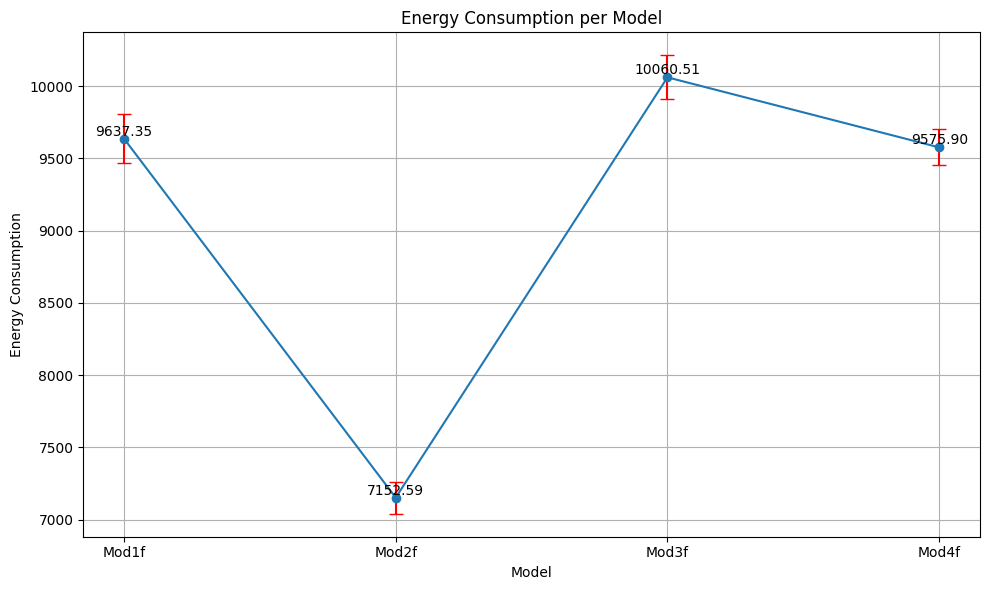

In [22]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_f, title):
    epoch_means = np.mean(EpochEnergy_f, axis=1)
    epoch_stds = np.std(EpochEnergy_f, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_f, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()

### cifar100

In [23]:
# read all the files in all the folders
# LayersTime
LayersTime_mod1c = np.load(mod_path_c[0] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod2c = np.load(mod_path_c[1] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod3c = np.load(mod_path_c[2] / 'Layers_time.npy', allow_pickle=True)
LayersTime_mod4c = np.load(mod_path_c[3] / 'Layers_time.npy', allow_pickle=True)
# TrainPartTime
TrainPartTime_mod1c = np.load(mod_path_c[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2c = np.load(mod_path_c[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3c = np.load(mod_path_c[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4c = np.load(mod_path_c[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1c = np.load(mod_path_c[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2c = np.load(mod_path_c[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3c = np.load(mod_path_c[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4c = np.load(mod_path_c[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1c = np.load(mod_path_c[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2c = np.load(mod_path_c[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3c = np.load(mod_path_c[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4c = np.load(mod_path_c[3] / 'Epoch_energy.npy', allow_pickle=True)

In [24]:
LayersTime_clist = [LayersTime_mod1c, LayersTime_mod2c, LayersTime_mod3c, LayersTime_mod4c]

/tmp/ipykernel_178857/3459181537.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(LayersName, rotation=45)


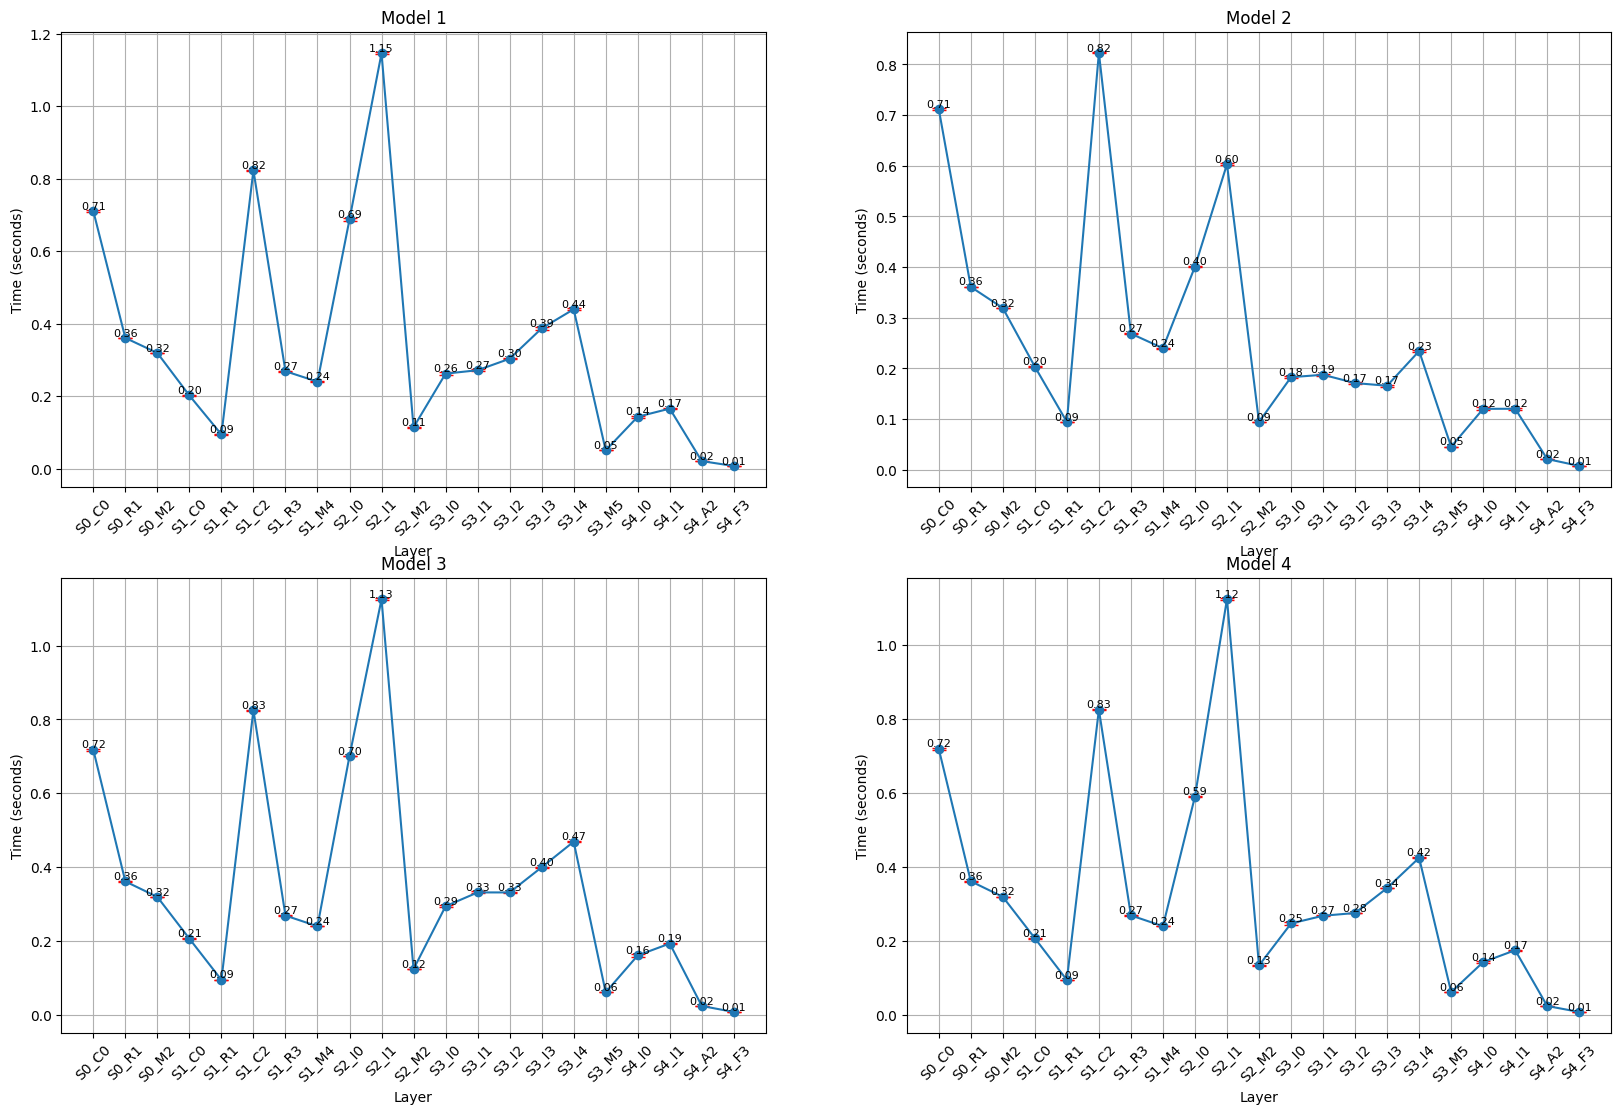

In [25]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 13))
for i, ax in enumerate(axs.flat):
    LayersTimei = LayersTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    layer_means = np.mean(LayersTimei, axis=1)
    layer_stds = np.std(LayersTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(LayersName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(layer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)


In [26]:
IncepNum = len(IncepBlock)
IncepTime_mod1c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod2c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod3c = np.zeros((IncepNum, epochs[0]))
IncepTime_mod4c = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime_mod1c[i,:] = LayersTime_mod1c[IncepBlockIndex[i], :]
    IncepTime_mod2c[i,:] = LayersTime_mod2c[IncepBlockIndex[i], :]
    IncepTime_mod3c[i,:] = LayersTime_mod3c[IncepBlockIndex[i], :]
    IncepTime_mod4c[i,:] = LayersTime_mod4c[IncepBlockIndex[i], :]

In [27]:
IncepTime_clist = [IncepTime_mod1c, IncepTime_mod2c, IncepTime_mod3c, IncepTime_mod4c]

/tmp/ipykernel_178857/2849450503.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(IncepBlock, rotation=45)


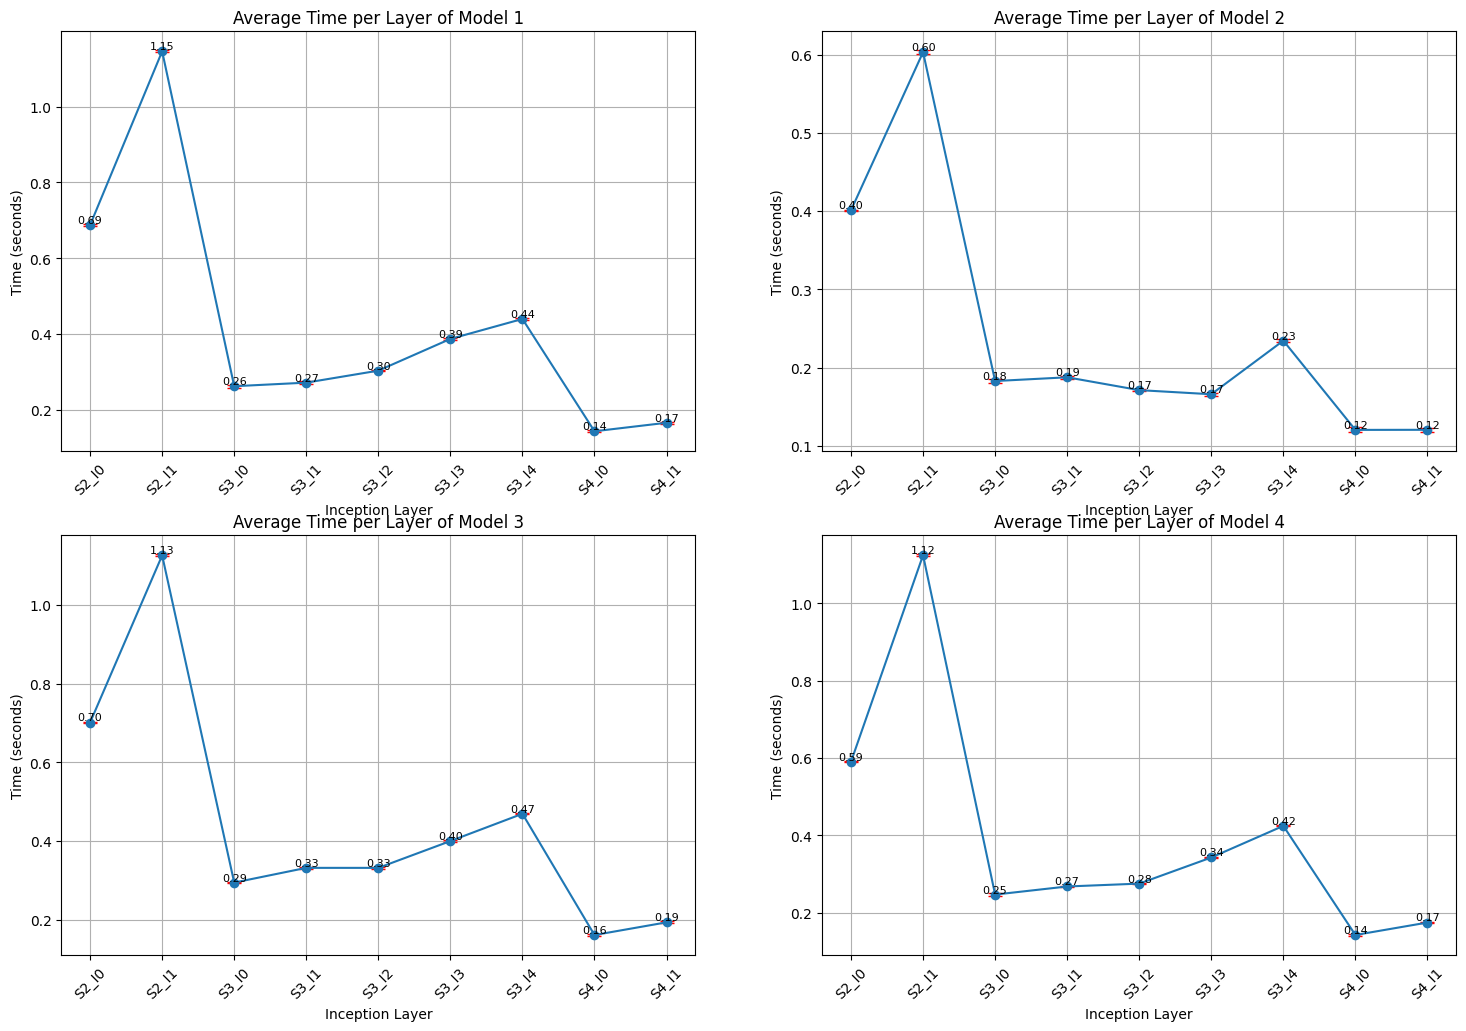

In [28]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
for i, ax in enumerate(axs.flat):
    IncepTimei = IncepTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    inceplayer_means = np.mean(IncepTimei, axis=1)
    inceplayer_stds = np.std(IncepTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time per Layer of Model {i+1}')
    ax.set_xlabel('Inception Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(IncepBlock, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(inceplayer_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

In [29]:
TrainPartTime_clist = [TrainPartTime_mod1c, TrainPartTime_mod2c, TrainPartTime_mod3c, TrainPartTime_mod4c]

/tmp/ipykernel_178857/4007285993.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


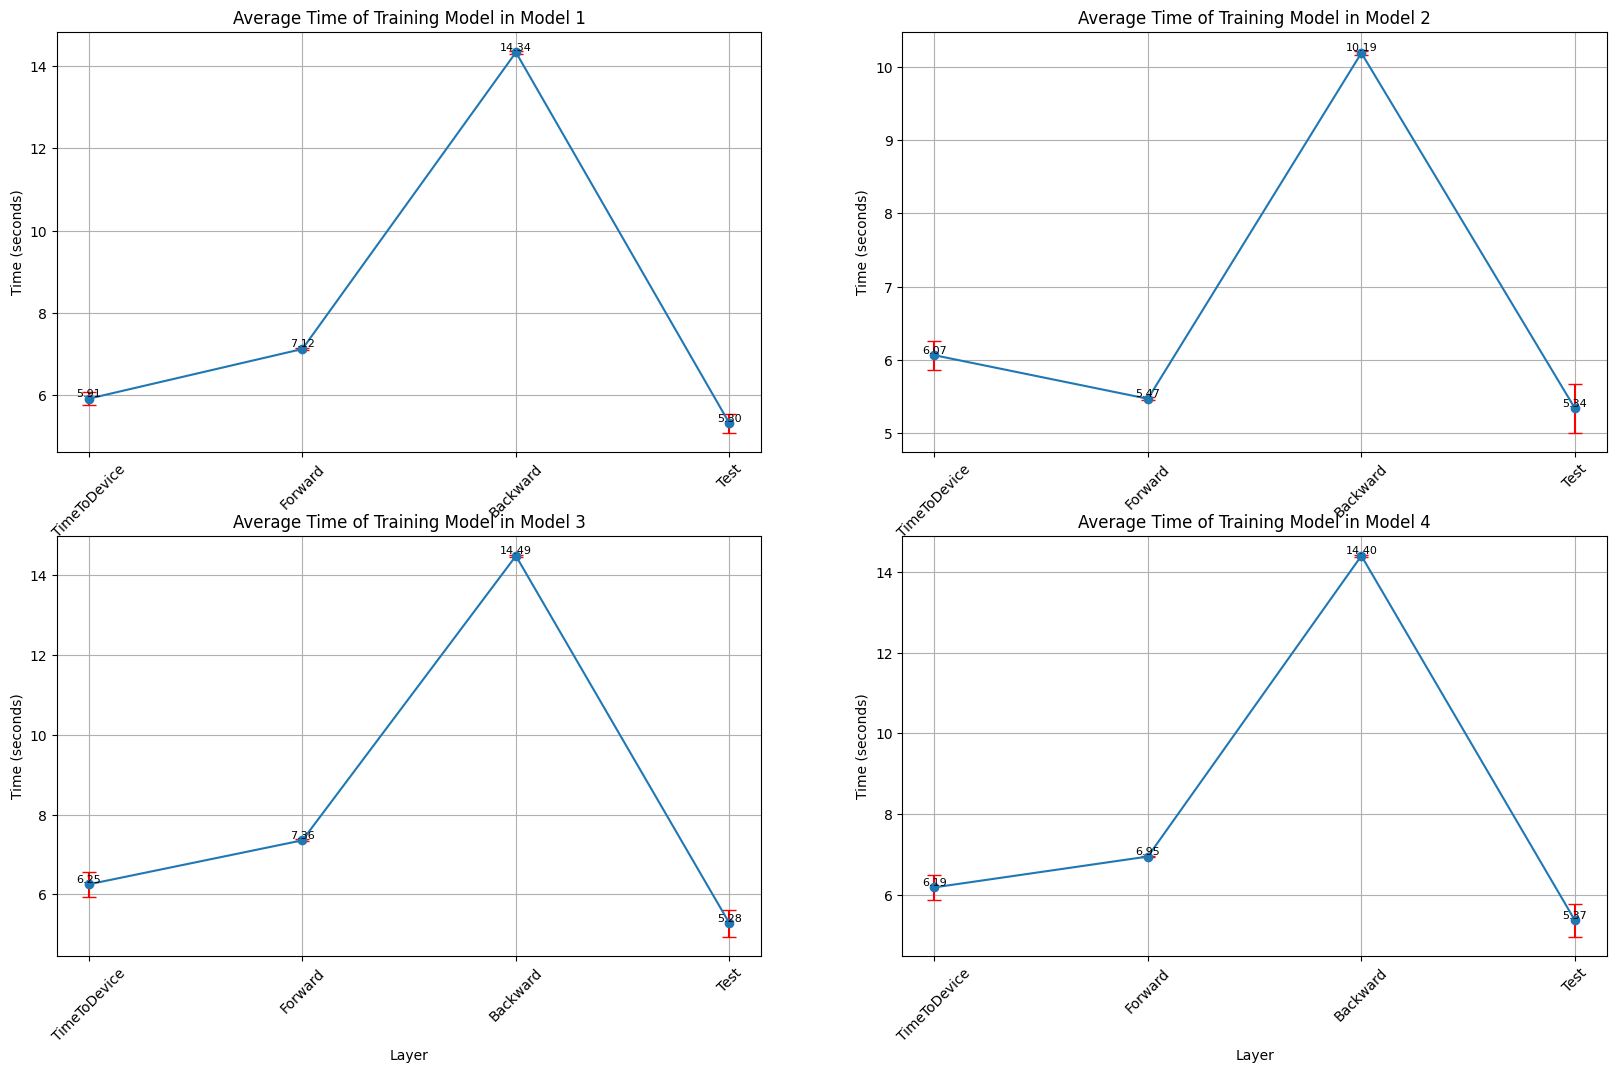

In [30]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

In [31]:
EpochEnergy_clist = [EpochEnergy_mod1c, EpochEnergy_mod2c, EpochEnergy_mod3c, EpochEnergy_mod4c]
# print(EpochEnergy_flist)
EpochEnergy_c = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [32]:
for i in range(len(EpochEnergy_clist)):
    for epoch in range(len(EpochEnergy_clist[i])):
        EpochEnergy_ci = EpochEnergy_clist[i]
        epoch_energy = EpochEnergy_ci[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_c[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_c}')

The total energy of each epoch in the model is [[8787.55 9169.81 9064.55 9028.81 9018.52 8999.79 8975.82 8989.68 9085.88
  8988.04 8964.39 8970.3  9075.03 8972.12 8999.32 9010.01 8996.32 9024.31
  9044.65 9114.85]
 [6758.53 6924.24 6916.72 6970.84 6942.7  6824.73 6784.56 6861.51 6853.27
  6823.31 6826.92 6905.46 6960.66 6920.18 6743.82 6838.6  6741.39 6782.15
  6878.79 6886.99]
 [9145.03 9318.97 9281.82 9303.37 9340.13 9357.94 9359.77 9355.46 9208.7
  9479.04 9285.7  9306.16 9436.71 9372.47 9428.74 9603.34 9412.5  9387.52
  9283.89 9277.6 ]
 [8759.85 8946.63 8883.5  8992.52 9004.12 9013.91 8839.36 8881.75 8887.39
  9047.58 8979.19 8935.96 8893.22 8994.98 8847.18 9083.56 8875.08 9137.19
  9111.86 9029.44]]


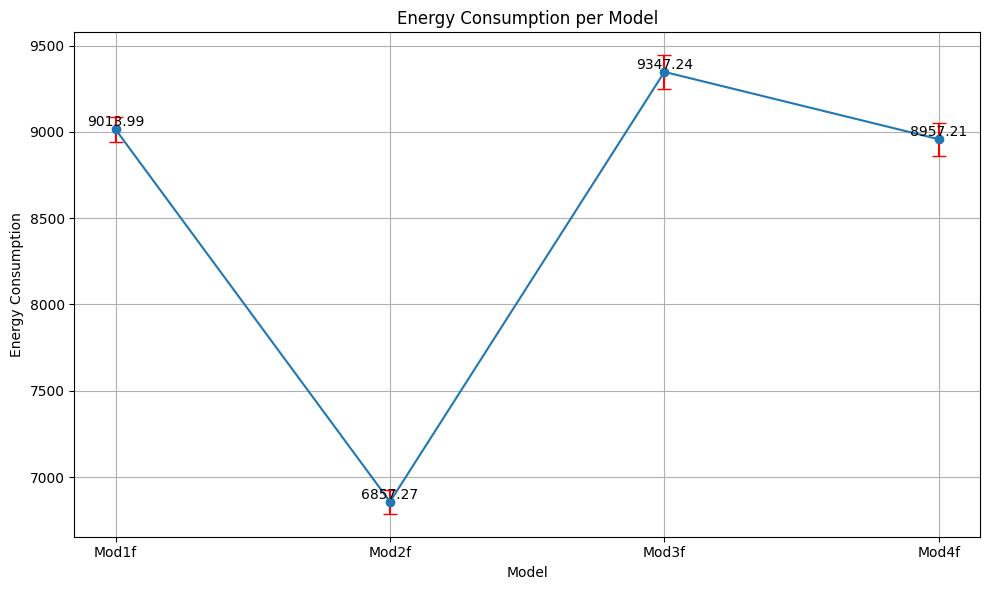

In [33]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_c, title):
    epoch_means = np.mean(EpochEnergy_c, axis=1)
    epoch_stds = np.std(EpochEnergy_c, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_c, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()